#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Directory Management

In [2]:
import os
os.getcwd()    # Checking address of the current directory

'/home/4006b94/#004 Machine Learning/Module End'

In [3]:
# Changing the directory to iLab's backend directory

os.chdir("/home/datasets/lab")

### Reading the data

In [4]:
# Data is stored into the variable 'train'
# No missing values found when viewed in MS Excel

train = pd.read_csv('train_CSE7405o.csv')

### Exploratory Data Analysis & Feature Engineering

In [5]:
# Checking the shape of the data

train.shape

(110527, 14)

In [6]:
train.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
train.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
train.describe( include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


In [9]:
# checking for null values

train.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Engineering ScheduledDay and AppointmentDay
    - From the domain perspective -->
        - ScheduledDay and AppointmentDay has more influence on target, when converted into:
            - "days gap" from scheduled day to appointment day.
            - "day of week" of the appointment day
        - because:
            - if days gap is more, patient might forget his appointment
            - patient is likely to miss an appointment on weekend

In [10]:
# Importing the library

from datetime import datetime

In [11]:
# Converting ScheduledDay & AppointmentDay into "datetime" format

train['ScheduledDay'] = train['ScheduledDay'].astype('datetime64[ns]')
train['AppointmentDay'] = train['AppointmentDay'].astype('datetime64[ns]')

In [12]:
# Extracting the Day of week of appointment day

train['AppointmentWeek'] = train.AppointmentDay.dt.day_name()

#### Observation --> 
    - By observing the data, we can see that some appointments are on the same dates as scheduled date
    - And also for all appointments, the time is recorded as 12:00 am
        - therefore for the appointments scheduled on same date, the days gap will come out to be "-1"
    - to avvoid this error -->
        - we will consider only date and not time -- and then calculate the days gap
        - Now, we will get "0" for appointments scheduled on same day

In [13]:
# Taking only date component from ScheduledDay & AppointmentDay

train['ScheduledDay'] = train['ScheduledDay'].dt.date
train['AppointmentDay'] = train['AppointmentDay'].dt.date

In [14]:
# Calculating the time gap between Scheduled date and Appointment date --> only no.of days are taken

train['WaitingTime'] = (train['AppointmentDay'] - train['ScheduledDay']).dt.days

In [15]:
# looking at unique values --> for any impossible values 

np.sort(train.WaitingTime.unique())

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179])

In [16]:
# ideally, the waiting time should not be less than "0"

train[(train.WaitingTime==-1) | (train.WaitingTime==-6)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentWeek,WaitingTime
27033,7.839273e+12,5679978,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,Monday,-1
55226,7.896294e+12,5715660,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,Tuesday,-1
64175,2.425226e+13,5664962,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,Wednesday,-1
71533,9.982316e+14,5686628,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,Thursday,-6
72362,3.787482e+12,5655637,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,Tuesday,-1


In [17]:
# 5 rows have Waiting time as "-6" or "-1"
# replacing these with Waiting time of "0"

train.WaitingTime.replace([-1,-6],[0,0], inplace=True)

# train.loc[train.WaitingTime< 0,train.WaitingTime] =0

In [18]:
# checking if the negative waiting time is removed or not

np.sort(train.WaitingTime.unique())

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126,
       127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179])

#### dropping some columns

In [19]:
train.drop(labels=['PatientId', 
                   'AppointmentID', 
                   'ScheduledDay', 
                   'AppointmentDay'], 
           axis=1, inplace=True)

In [20]:
train.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentWeek,WaitingTime
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,0


In [21]:
# Checking the shape of data

train.shape

(110527, 12)

In [22]:
# Checking for number of unique values

train.nunique()

Gender               2
Age                104
Neighbourhood       81
Scholarship          2
Hipertension         2
Diabetes             2
Alcoholism           2
Handcap              5
SMS_received         2
No-show              2
AppointmentWeek      6
WaitingTime        129
dtype: int64

In [23]:
# Checking data types of features in the data

train.dtypes

Gender             object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
AppointmentWeek    object
WaitingTime         int64
dtype: object

#### Observation
- The below features are in "int" type, whereas they are actually of category type
        - Scholarship
        - Hipertension
        - Diabetes
        - Alcoholism
        - Handcap
        - SMS_received

#### Changing data types of features

In [24]:
train.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'AppointmentWeek', 'WaitingTime'],
      dtype='object')

In [25]:
# adding all categorical variables to a list cat_attr

cat_attr = ['Gender', 
            'Neighbourhood', 
            'Scholarship', 
            'Hipertension', 
            'Diabetes', 
            'Alcoholism', 
            'Handcap', 
            'SMS_received',
            'AppointmentWeek', 
            'No-show']

In [26]:
# Type casting variables into correct data types

for i in cat_attr :
    train[i] = train[i].astype("category")

In [27]:
train.dtypes

Gender             category
Age                   int64
Neighbourhood      category
Scholarship        category
Hipertension       category
Diabetes           category
Alcoholism         category
Handcap            category
SMS_received       category
No-show            category
AppointmentWeek    category
WaitingTime           int64
dtype: object

#### Age Column

In [28]:
# Looking for unique values in age column

np.sort(train.Age.unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [29]:
# Age of "-1", is not possible
# it could be during pregnancy stage, but during pregnancy patientId will be that of mother's
# therefore, dropping that row is the best idea

train[train.Age==-1]

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentWeek,WaitingTime
99832,F,-1,ROMÃO,0,0,0,0,0,0,No,Monday,0


In [30]:
# dropping the row with age = "-1"

train = train[train.Age != -1]

In [31]:
# Checking to see if that row is dropped or not

print(train.shape)
train[train.Age==-1]

(110526, 12)


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentWeek,WaitingTime


### Divide data into train and validation

In [32]:
X = train.drop('No-show', axis=1)
y=train['No-show']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0, stratify=y)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(77368, 11)
(33158, 11)
(77368,)
(33158,)


In [35]:
X_train.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,AppointmentWeek,WaitingTime
102915,M,56,SANTA MARTHA,0,0,0,0,0,0,Friday,0
18046,F,47,JOANA D´ARC,0,1,0,0,0,0,Monday,0
67667,M,55,JARDIM CAMBURI,0,0,0,0,0,0,Tuesday,1
48314,F,19,PIEDADE,1,0,0,0,0,0,Tuesday,0
42553,F,0,ANTÔNIO HONÓRIO,0,0,0,0,0,1,Tuesday,25


### Handling Categorical variables

In [36]:
ohe_col=['Gender','AppointmentWeek']
X_train=pd.get_dummies(X_train,columns=ohe_col,drop_first=True)
X_test=pd.get_dummies(X_test,columns=ohe_col,drop_first=True)

In [37]:
No_show={'No':1,'Yes':0}

y_train=y_train.map(No_show)
y_test=y_test.map(No_show)

In [38]:
X_train.shape,y_train.shape

((77368, 15), (77368,))

#### Neighbourhood column has 81 unique categorical values
    -Therefore doing OneHotENcoding(or Dummification) will result in 80 new columns with 0s and 1s which will increase model complexity
    - "CatboostEncoder" --> will group the rows by each value of Neighbourhood and replace it with mean of Target variable for each group
    - Therefore, Neighbourhood column is treated with CatBoostEncoder

In [39]:
# pip install --upgrade category_encoders

In [40]:
X_train.head()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,Gender_M,AppointmentWeek_Monday,AppointmentWeek_Saturday,AppointmentWeek_Thursday,AppointmentWeek_Tuesday,AppointmentWeek_Wednesday
102915,56,SANTA MARTHA,0,0,0,0,0,0,0,1,0,0,0,0,0
18046,47,JOANA D´ARC,0,1,0,0,0,0,0,0,1,0,0,0,0
67667,55,JARDIM CAMBURI,0,0,0,0,0,0,1,1,0,0,0,1,0
48314,19,PIEDADE,1,0,0,0,0,0,0,0,0,0,0,1,0
42553,0,ANTÔNIO HONÓRIO,0,0,0,0,0,1,25,0,0,0,0,1,0


In [41]:
y_train

102915    1
18046     1
67667     1
48314     1
42553     0
         ..
62160     1
100776    0
65595     1
66429     1
50864     0
Name: No-show, Length: 77368, dtype: category
Categories (2, int64): [1, 0]

In [42]:
from category_encoders import TargetEncoder
te = TargetEncoder()

In [43]:
X_train['Neighbourhood']=te.fit_transform(X_train['Neighbourhood'], y_train.astype("int"))
X_test['Neighbourhood']=te.transform(X_test['Neighbourhood'])

/home/4006b94/.local/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [44]:
X_train.head()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,Gender_M,AppointmentWeek_Monday,AppointmentWeek_Saturday,AppointmentWeek_Thursday,AppointmentWeek_Tuesday,AppointmentWeek_Wednesday
102915,56,0.840930,0,0,0,0,0,0,0,1,0,0,0,0,0
18046,47,0.820383,0,1,0,0,0,0,0,0,1,0,0,0,0
67667,55,0.803799,0,0,0,0,0,0,1,1,0,0,0,1,0
48314,19,0.804878,1,0,0,0,0,0,0,0,0,0,0,1,0
42553,0,0.802030,0,0,0,0,0,1,25,0,0,0,0,1,0


In [45]:
X_train.tail()

,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,WaitingTime,Gender_M,AppointmentWeek_Monday,AppointmentWeek_Saturday,AppointmentWeek_Thursday,AppointmentWeek_Tuesday,AppointmentWeek_Wednesday
62160,56,0.804916,0,0,0,0,0,0,0,1,1,0,0,0,0
100776,1,0.756098,0,0,0,0,0,1,8,1,0,0,0,1,0
65595,0,0.802489,0,0,0,0,0,0,26,0,1,0,0,0,0
66429,65,0.819048,0,0,0,0,0,0,19,0,1,0,0,0,0
50864,28,0.776021,1,0,0,0,0,1,4,0,0,0,0,1,0


In [46]:
X_train.Neighbourhood.nunique()

79

# Model Building

### 1. Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=500)

In [48]:
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

print(recall_score(y_true = y_train, y_pred = y_train_pred, pos_label = 1))
print(recall_score(y_true = y_test, y_pred = y_test_pred, pos_label = 1))

0.9913839177261317
0.9911949210188195


### 2. Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

In [51]:
# fit on train data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [53]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[15253,   370],
       [ 1007, 60738]])

In [54]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[ 2383,  4313],
       [ 4951, 21511]])

In [55]:
dt_model.get_depth()

44

In [56]:
print(recall_score(y_true = y_train, y_pred = y_train_pred, pos_label = 1))
print(recall_score(y_true = y_test, y_pred = y_test_pred, pos_label = 1))

0.9836909871244636
0.8129015191595496


#### Extracting Feature Importances

In [57]:
importances = dt_model.feature_importances_

In [58]:
range(len(importances))

range(0, 15)

In [59]:
importances

array([0.28025412, 0.22039988, 0.02095283, 0.02245042, 0.00970884,
       0.00699661, 0.00739376, 0.01812523, 0.25256449, 0.04566403,
       0.02634352, 0.00030785, 0.02782868, 0.02973741, 0.03127233])

In [60]:
sorted_indices = np.argsort(importances)
features = list(X_train.columns)

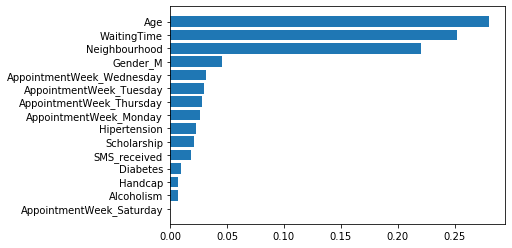

In [61]:
plt.barh(range(len(importances)), importances[sorted_indices])
plt.yticks(range(len(importances)),
          [features[i] for i in sorted_indices])
plt.show()

##### Hyper_Parameter tuning

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# Creating the model object
dt_cv_model = DecisionTreeClassifier()

In [64]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2,20,30],
    "max_depth": [20,30,40]
}

###### DecisionTreeClassifier()
    - min_samples_split : int or float, default=2
               - The minimum number of samples required to split an internal node
               - Too high values can lead to under-fitting hence, it should be fine-tuned with care
               
    - min_samples_leaf : int or float, default=1
            - The minimum number of samples required to be at a leaf node
            - Too high values can lead to under-fitting
            
    - max_depth : int, default=None
            - The maximum depth of the tree. 
            - If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split
            - Too high values can lead to over-fitting
            
    - max_features : int, float, string or None, optional (default=”auto”)
            - The number of features to consider when looking for the best split
            - If “auto”, then max_features=sqrt(n_features).

In [65]:
rs_object = RandomizedSearchCV(estimator = dt_cv_model, param_distributions = param_grid,
                        verbose=45, n_jobs=-1, cv=5, n_iter=5)

In [66]:
rs_object.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [20, 30, 40],
                                        'min_samples_split': [2, 20, 30]},
                   verbose=45)

In [67]:
# 'cv_results_' will give details of all the instances of the models that are run and their statistics
pd.DataFrame(rs_object.cv_results_).head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.234470,0.004474,0.009703,0.000181,30,20,entropy,"{'min_samples_split': 30, 'max_depth': 20, 'cr...",0.760825,0.760243,0.765478,0.762360,0.762554,0.762292,0.001821,1
1,0.252786,0.009564,0.011514,0.000887,2,30,gini,"{'min_samples_split': 2, 'max_depth': 30, 'cri...",0.713649,0.712421,0.715200,0.721644,0.715117,0.715606,0.003189,5


In [68]:
#Out of all the models that the RandomizedSearchCV has tried, it will save the best model parameters
rs_object.best_params_

{'min_samples_split': 30, 'max_depth': 20, 'criterion': 'entropy'}

In [69]:
rs_object.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_split=30)

In [70]:
y_train_pred = rs_object.predict(X_train)
y_test_pred = rs_object.predict(X_test)

In [71]:
confusion_matrix(y_true=y_train, y_pred=y_train_pred)

array([[ 5922,  9701],
       [ 3142, 58603]])

In [72]:
confusion_matrix(y_true=y_test, y_pred=y_test_pred)

array([[ 1421,  5275],
       [ 2451, 24011]])

In [73]:
print(recall_score(y_true = y_train, y_pred = y_train_pred, pos_label = 1))
print(recall_score(y_true = y_test, y_pred = y_test_pred, pos_label = 1))

0.9491132885253867
0.9073766155241478


### 3. RandomForest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
clf_rf = RandomForestClassifier(n_estimators=100)

clf_rf.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [76]:
y_pred_train = clf_rf.predict(X_train)
print("Train Recall:",recall_score(y_train,y_pred_train))

y_pred_test = clf_rf.predict(X_test)
print("Test Recall:",recall_score(y_test,y_pred_test))

Train Recall: 0.9951413069884201
Test Recall: 0.9194316378202706


##### GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
## Use Grid Search for parameter tuning. (Exhaustive search over specified parameter values for an estimator)

## n_jobs = -1 uses all cores of processor
## max_features is the maximum number of attributes to select for each tree

rfc_grid = RandomForestClassifier(n_jobs=-1,max_features='sqrt')
 
# Use a grid over parameters of interest

param_grid = { 
           "n_estimators" : [25,50,75],
           "max_depth" : [5, 10],
           "min_samples_leaf" : [2, 4]}
 
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid, cv = 3)

In [79]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [2, 4],
                         'n_estimators': [25, 50, 75]})

In [80]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)

0.7984438014885348 {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 75}


In [81]:
y_pred_train = rfc_cv_grid.predict(X_train)
y_pred_test = rfc_cv_grid.predict(X_test)

In [82]:
print("Train Recall:",recall_score(y_train,y_pred_train))
print("Test Recall:",recall_score(y_test,y_pred_test))

Train Recall: 1.0
Test Recall: 0.9998110498072708


### 4. XGBoost Classifier

In [74]:
X_train.dtypes

Age                             int64
Neighbourhood                 float64
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                      category
SMS_received                 category
WaitingTime                     int64
Gender_M                        uint8
AppointmentWeek_Monday          uint8
AppointmentWeek_Saturday        uint8
AppointmentWeek_Thursday        uint8
AppointmentWeek_Tuesday         uint8
AppointmentWeek_Wednesday       uint8
dtype: object

In [75]:
X_train.columns

Index(['Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received', 'WaitingTime', 'Gender_M',
       'AppointmentWeek_Monday', 'AppointmentWeek_Saturday',
       'AppointmentWeek_Thursday', 'AppointmentWeek_Tuesday',
       'AppointmentWeek_Wednesday'],
      dtype='object')

In [76]:
XG_attr = ['Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received']


In [77]:
for i in XG_attr :
    X_train[i] = X_train[i].astype("int")
    
for i in XG_attr :
    X_test[i] = X_test[i].astype("int")

In [78]:
X_train.dtypes, X_test.dtypes

(Age                            int64
 Neighbourhood                float64
 Scholarship                    int64
 Hipertension                   int64
 Diabetes                       int64
 Alcoholism                     int64
 Handcap                        int64
 SMS_received                   int64
 WaitingTime                    int64
 Gender_M                       uint8
 AppointmentWeek_Monday         uint8
 AppointmentWeek_Saturday       uint8
 AppointmentWeek_Thursday       uint8
 AppointmentWeek_Tuesday        uint8
 AppointmentWeek_Wednesday      uint8
 dtype: object,
 Age                            int64
 Neighbourhood                float64
 Scholarship                    int64
 Hipertension                   int64
 Diabetes                       int64
 Alcoholism                     int64
 Handcap                        int64
 SMS_received                   int64
 WaitingTime                    int64
 Gender_M                       uint8
 AppointmentWeek_Monday         ui

In [89]:
from xgboost import XGBClassifier

In [94]:
XGB_model = XGBClassifier(n_estimators=400, gamma=0.5,learning_rate=0.1,use_label_encoder=False)

In [95]:
XGB_model.fit(X_train, y_train)

[19:41:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [96]:
y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

In [97]:
print("Train Recall:",recall_score(y_train,y_pred_train))
print("Test Recall:",recall_score(y_test,y_pred_test))

Train Recall: 0.9939428293788971
Test Recall: 0.9843171340034766


In [98]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_pred_train, digits=4))

              precision    recall  f1-score   support

           0     0.8330    0.1194    0.2088     15623
           1     0.8169    0.9939    0.8968     61745

    accuracy                         0.8173     77368
   macro avg     0.8249    0.5567    0.5528     77368
weighted avg     0.8201    0.8173    0.7578     77368



In [99]:
print(classification_report(y_test, y_pred_test, digits=4))

              precision    recall  f1-score   support

           0     0.5077    0.0639    0.1135      6696
           1     0.8060    0.9843    0.8863     26462

    accuracy                         0.7984     33158
   macro avg     0.6569    0.5241    0.4999     33158
weighted avg     0.7458    0.7984    0.7302     33158



##### Hyper-parameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [103]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {
     'colsample_bytree': np.linspace(0.6, 0.8, 2),
     'n_estimators':[100,200],
     'max_depth': [5, 10]
}

CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 3)

In [104]:
CV_XGB.fit(X = X_train, y=y_train)

/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:42:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/share/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:43:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [105]:
# Find best model
best_xgb_model = CV_XGB.best_estimator_
print (CV_XGB.best_score_, CV_XGB.best_params_)

0.7980301869458467 {'colsample_bytree': 0.6, 'max_depth': 5, 'n_estimators': 100}


In [106]:
best_xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred_train=best_xgb_model.predict(X_train)
y_pred_test=best_xgb_model.predict(X_test)

In [108]:
print("Train Recall:",recall_score(y_train,y_pred_train))
print("Test Recall:",recall_score(y_test,y_pred_test))

Train Recall: 0.9936027208680864
Test Recall: 0.9896833194769858
